# Solucionador de Sets

Elaborado por **Nico Quijada**
nicoqr@ciencias.unam.mx

Tenemos las siguientes propiedades:

- **Color**
    - Rojo: 1
    - Azul: 2
    - Verde: 3
    
- **Número**
    - Uno: 1
    - Dos: 2
    - Tres: 3
    
- **Figura**
    - Triángulo: 1
    - Elipse: 2
    - Bean: 3

- **Relleno**
    - Sólido: 1
    - Rayado: 2
    - Ninguno: 3

    
El total de posibilidades es $3^{4} = 81$

Daremos un código que de la solución a cada pantalla de Sets.

## Primera versión: Fuerza bruta

La idea para la primera solución es la siguiente: Ordenamos nuestras cartas y comenzaremos a iterar en orden creciente. En una primera aproximación el orden que seguiremos es: color, número, figura, relleno. 

Necesitamos encontrar __ternas__ de cartas que sean adecuadas donde una terna es _adecuada_ si cumple que cada propiedad es común a las tres o bien distinta a las tres. Esto debe ser válido para cada propiedad. Por ejemplo:

- Mismo color, diferentes figuras, diferentes números, mismo relleno

## Creación de cartas

Una idea es trabajar con objetos y modificar las propiedades de las cartas. Otra es trabajar con listas. Nuestra primera aproximación será con listas.

In [6]:
#Creación de una carta. Daremos una input y almacenaremos una lista con todas las propiedades. 
#Carta1 = [color, número, figura, relleno]

def cr_carta():
    ct = [] #Lista para la carta
    ct.append(int(input("Color")))
    ct.append(int(input("Número")))
    ct.append(int(input("Figura")))
    ct.append(int(input("Relleno")))
    return ct

## Definición de la pantalla

Damos una lista que con cada una de las cartas en nuestro mazo por pantalla

In [20]:
#Mazo de cartas

def mazo(nc = 12):
    '''
    Recibe el número de cartas que hay en la pantalla. Predeterminados son doce. Regresa una lista con cada carta
    '''
    mz = []
    for i in range(nc):
        print("\nCarta no." + str(i+1))
        mz.append(cr_carta())
    return mz

## Ternas
Almacenaremos las cartas en un arreglo que nos permitirá verificar si las cartas son adecuadas. 

In [22]:
import itertools #Biblioteca para realizar las combinaciones relevantes

In [27]:
def ternas(mazo):
    return list(itertools.combinations(mazo, 3))

## Terna adecuada

En el siguiente bloque determinamos si una terna es adecuada

In [91]:
import pandas as pd #Usamos pandas para manejar las propiedades

In [99]:
#Cartas de prueba. Sujetas a modificación
l1 = [1,4,3,2]
l2 = [1,4,3,2]
l3 = [1,3,3,2]

In [101]:
def adecuada(terna):
    '''
    Recibimos una terna en forma de lista de listas y decidimos si es (o no) adecuada
    '''
    mat_ter = pd.DataFrame(terna) #Transformamos nuestra terna en un DataFrame para su análisis
    ad = [] #Lista para saber si la terna es adecuada o no
    for i in range(4): #Para cada propiedad
        if mat_ter[i].eq(mat_ter[i][0]).all(): #Si cada carta comparte la propiedad, es adecuada en esa propiedad
            #print(str(i) + "Sí")
            ad.append(True)
            continue
        elif mat_ter[i].size == mat_ter[i].drop_duplicates().size: #Si cada carta es diferente en esa propiedad, tmb.
            #print(str(i) + "Sí")
            ad.append(True)
            continue
        else: #Si no se cumple lo anterior, no es adecuada en esa propiedad
            #print("No")
            ad.append(False)
            continue
    if False in ad:
        return False #No es adecuada
    else:
        return True #Sí es adecuada

## Ternas adecuadas del mazo

Ahora veremos cuáles son las cartas adecuadas de un mazo

In [131]:
def mz_adec(ternas):
    adecuadas = []
    for terna in ternas:
        if adecuada(terna) == True:
            adecuadas.append(terna)
        else:
            continue
    return adecuadas

## Zona de pruebas

Aquí podemos hacer pruebas

In [132]:
mazoprueba = mazo()


Carta no.1
Color3
Número2
Figura3
Relleno3

Carta no.2
Color3
Número1
Figura2
Relleno3

Carta no.3
Color1
Número1
Figura2
Relleno1

Carta no.4
Color3
Número3
Figura1
Relleno1

Carta no.5
Color3
Número1
Figura3
Relleno2

Carta no.6
Color1
Número2
Figura3
Relleno2

Carta no.7
Color3
Número1
Figura1
Relleno1

Carta no.8
Color1
Número3
Figura1
Relleno3

Carta no.9
Color2
Número2
Figura2
Relleno3

Carta no.10
Color3
Número3
Figura3
Relleno1

Carta no.11
Color2
Número3
Figura1
Relleno3

Carta no.12
Color1
Número3
Figura3
Relleno3


In [133]:
print(mazoprueba)

[[3, 2, 3, 3], [3, 1, 2, 3], [1, 1, 2, 1], [3, 3, 1, 1], [3, 1, 3, 2], [1, 2, 3, 2], [3, 1, 1, 1], [1, 3, 1, 3], [2, 2, 2, 3], [3, 3, 3, 1], [2, 3, 1, 3], [1, 3, 3, 3]]


In [134]:
tmp = ternas(mazoprueba)

In [135]:
mp_adec = mz_adec(tmp)

In [136]:
print(mp_adec)

[([3, 2, 3, 3], [3, 1, 3, 2], [3, 3, 3, 1]), ([3, 1, 2, 3], [3, 1, 3, 2], [3, 1, 1, 1]), ([1, 1, 2, 1], [1, 2, 3, 2], [1, 3, 1, 3])]


A continuación todas las ternas adecuadas posibles

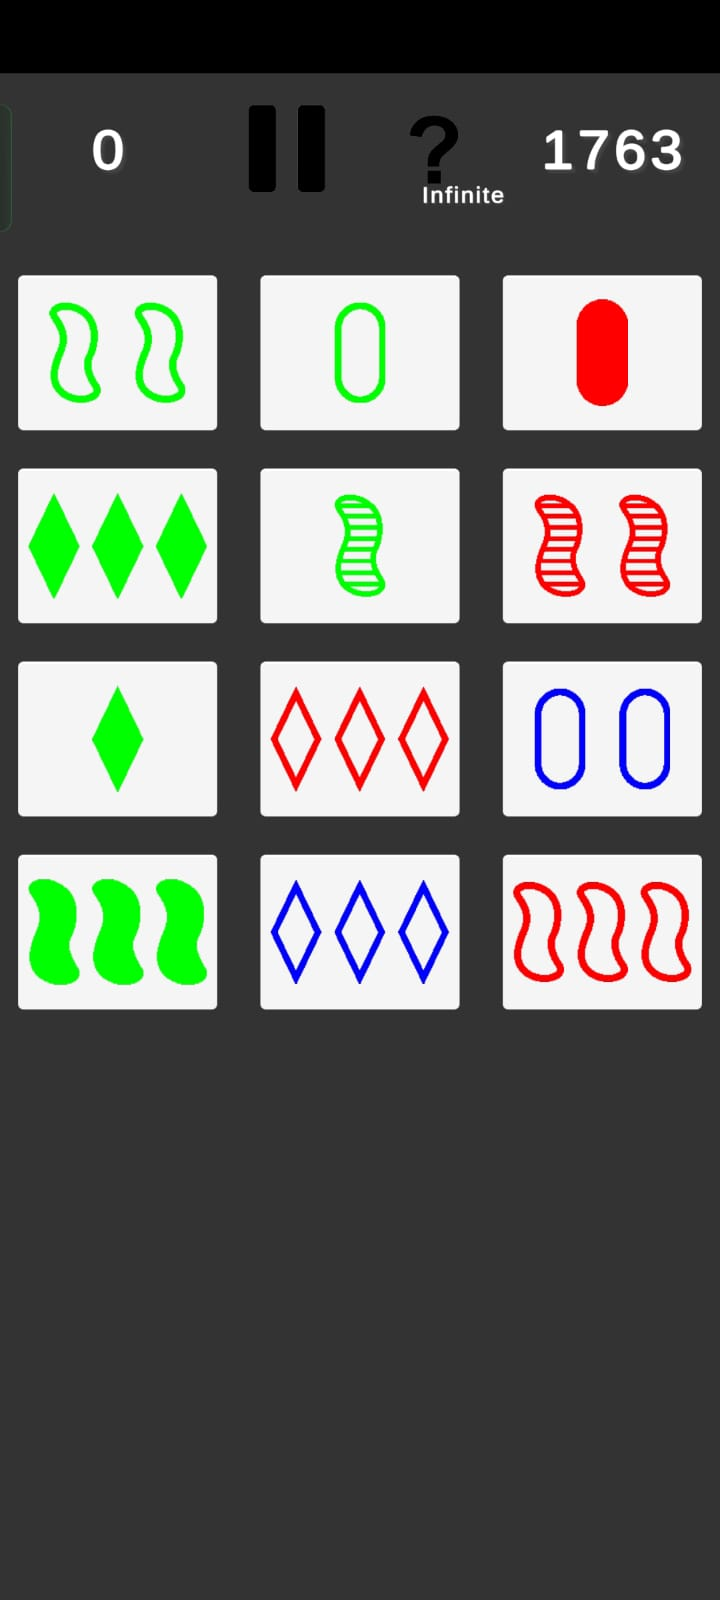